In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
foodlabel = pd.read_csv("foodlabeldataset.csv")

In [3]:
foodlabel

,Product Name,Ingredients,Protein (g),Carbs (g),Fat (g),Fiber (g),Sugar (g),Calories,Calcium (mg),Sodium (mg),Healthy (1/0),Reason
0,Maggi,"Wheat Flour, Palm Oil, Salt, Spices",3,60,12,2,3,369,21,1100,0,"High sodium, low fiber"
1,Maggi,"Whole Wheat Flour, Palm Oil, Salt, Spices",6,58,10,6,2,347,26,1000,1,"Higher fiber due to whole wheat, moderate sodium"
2,Maggi,"Rice Flour, Palm Oil, Salt, Spices",3,62,14,1,3,371,15,1049,0,"High sodium, low protein and fiber"
3,Maggi,"Oats, Palm Oil, Salt, Spices",7,55,9,6,2,343,29,948,1,"High fiber, moderate sodium, balanced nutrition"
4,Maggi,"Wheat Flour, Dehydrated Vegetables, Salt, Spices",3,58,11,3,4,362,18,1079,0,"High sodium, low fiber, moderate fat"
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Lays,"Potatoes, Vegetable Oil, Salt, Vinegar",2,14,11,1,0,145,15,209,0,"High sodium, moderate fat, low fiber"
996,Soup,"Chicken Broth, Noodles, Chicken, Vegetables, Salt",2,3,24,2,3,190,26,890,0,"High in sodium and low in protein, processed i..."
997,Maggi,"Oats, Palm Oil, Salt, Spices",8,55,10,5,2,342,29,950,1,"High fiber, moderate sodium, balanced nutrition"
998,Peanut Butter,"Organic Peanuts, Sea Salt",8,18,6,2,0,185,41,0,1,"Organic with no added sugars, healthier option"


In [4]:
foodlabel.shape

(1000, 12)

In [5]:
foodlabel.describe()

,Protein (g),Carbs (g),Fat (g),Fiber (g),Sugar (g),Calories,Calcium (mg),Sodium (mg),Healthy (1/0)
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.60800,24.879000,12.091000,3.016000,5.393000,226.301000,35.697000,300.715000,0.477000
std,3.70433,19.383087,9.125459,2.573007,7.235116,85.155034,36.632214,390.321948,0.499721
min,0.00000,0.000000,0.000000,0.000000,0.000000,28.000000,3.000000,0.000000,0.000000
25%,3.00000,13.000000,6.000000,1.000000,1.000000,161.000000,16.000000,60.000000,0.000000
50%,5.00000,16.000000,9.000000,2.000000,2.000000,196.000000,29.000000,133.000000,0.000000
75%,8.00000,30.000000,14.000000,4.000000,6.000000,316.000000,40.000000,220.250000,1.000000
max,17.00000,64.000000,56.000000,13.000000,31.000000,396.000000,302.000000,1602.000000,1.000000


In [6]:
foodlabel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product Name   1000 non-null   object
 1   Ingredients    1000 non-null   object
 2   Protein (g)    1000 non-null   int64 
 3   Carbs (g)      1000 non-null   int64 
 4   Fat (g)        1000 non-null   int64 
 5   Fiber (g)      1000 non-null   int64 
 6   Sugar (g)      1000 non-null   int64 
 7   Calories       1000 non-null   int64 
 8   Calcium (mg)   1000 non-null   int64 
 9   Sodium (mg)    1000 non-null   int64 
 10  Healthy (1/0)  1000 non-null   int64 
 11  Reason         1000 non-null   object
dtypes: int64(9), object(3)
memory usage: 93.9+ KB


In [7]:
foodlabel.isnull().sum()

Product Name     0
Ingredients      0
Protein (g)      0
Carbs (g)        0
Fat (g)          0
Fiber (g)        0
Sugar (g)        0
Calories         0
Calcium (mg)     0
Sodium (mg)      0
Healthy (1/0)    0
Reason           0
dtype: int64

In [8]:
foodlabel.duplicated().sum()

0

In [9]:
foodlabel=foodlabel.drop(['Product Name','Ingredients','Reason'],axis=1)

In [10]:
foodlabel.head()

,Protein (g),Carbs (g),Fat (g),Fiber (g),Sugar (g),Calories,Calcium (mg),Sodium (mg),Healthy (1/0)
0,3,60,12,2,3,369,21,1100,0
1,6,58,10,6,2,347,26,1000,1
2,3,62,14,1,3,371,15,1049,0
3,7,55,9,6,2,343,29,948,1
4,3,58,11,3,4,362,18,1079,0


In [11]:
# Standardize the training features
Y=foodlabel['Healthy (1/0)'].values
X=foodlabel.drop(['Healthy (1/0)'],axis=1)
data=foodlabel.drop(['Healthy (1/0)'],axis=1)
'''scaler=StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=data.columns)
X.head()'''

'scaler=StandardScaler()\nX=scaler.fit_transform(X)\nX=pd.DataFrame(X,columns=data.columns)\nX.head()'

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

In [21]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X.values, Y, test_size=0.2, random_state=42)

# ======================
# Optimized SVM
# ======================
param_grid_svm = {
    'C': [0.2,0.2],       # Regularization parameter
    'gamma': [0.1,0.1],                  
    'kernel': ['rbf']               # RBF kernel
}

# Perform Grid Search for SVM
grid_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

# Get the best SVM model
best_svm = grid_svm.best_estimator_

# ======================
# Random Forest
# ======================
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_clf.fit(X_train, y_train)

# ======================
# XGBoost
# ======================
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=200, max_depth=6, random_state=42)
xgb_clf.fit(X_train, y_train)

# ======================
# Ensemble Model using Voting Classifier
# ======================
ensemble_clf = VotingClassifier(estimators=[
    ('Optimized SVM', best_svm),
    ('Random Forest', rf_clf),
    ('XGBoost', xgb_clf)
], voting='soft')  # Use soft voting to leverage probabilities
ensemble_clf.fit(X_train, y_train)

# ======================
# Evaluation Metrics
# ======================
def print_metrics(model, name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Metrics for {name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-" * 30)

# Print metrics for each model
print_metrics(best_svm, "SVM")
print_metrics(rf_clf, "Random Forest")
print_metrics(xgb_clf, "XGBoost")
print_metrics(ensemble_clf, "Ensemble Model")

# ======================
# Best SVM Parameters
# ======================





C:\Users\sathi\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [18:15:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\sathi\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [18:15:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Metrics for SVM:
  Accuracy: 0.9350
  Precision: 0.9423
  Recall: 0.9350
  F1 Score: 0.9346
------------------------------
Metrics for Random Forest:
  Accuracy: 0.9900
  Precision: 0.9902
  Recall: 0.9900
  F1 Score: 0.9900
------------------------------
Metrics for XGBoost:
  Accuracy: 0.9850
  Precision: 0.9854
  Recall: 0.9850
  F1 Score: 0.9850
------------------------------
Metrics for Ensemble Model:
  Accuracy: 0.9950
  Precision: 0.9950
  Recall: 0.9950
  F1 Score: 0.9950
------------------------------

Best SVM Parameters:
{'C': 0.2, 'gamma': 0.1, 'kernel': 'rbf'}


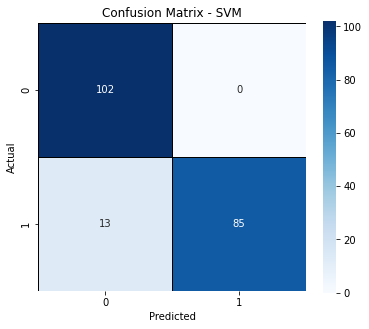

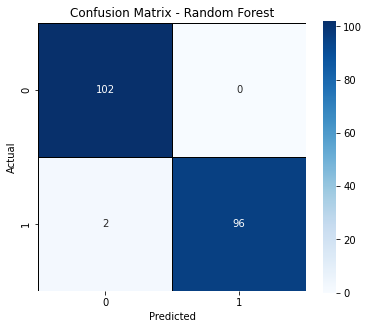

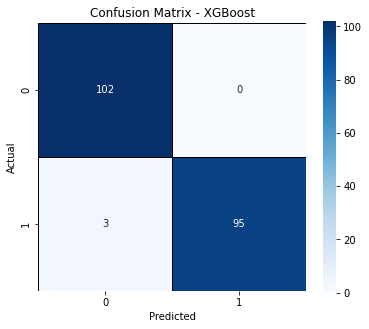

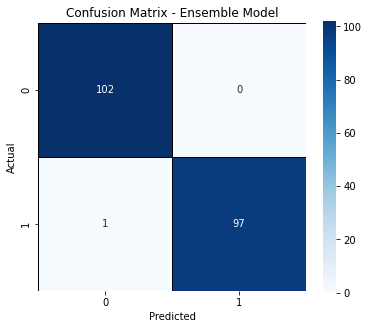

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Function to plot confusion matrix with proper borders
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true),
                linewidths=0.8, linecolor='black', square=True)  # Added linewidths and linecolor for better borders
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Predictions from each model
y_pred_svm = best_svm.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_xgb = xgb_clf.predict(X_test)
y_pred_ensemble = ensemble_clf.predict(X_test)

# Plot confusion matrices
plot_confusion_matrix(y_test, y_pred_svm, "SVM")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")
plot_confusion_matrix(y_test, y_pred_ensemble, "Ensemble Model")



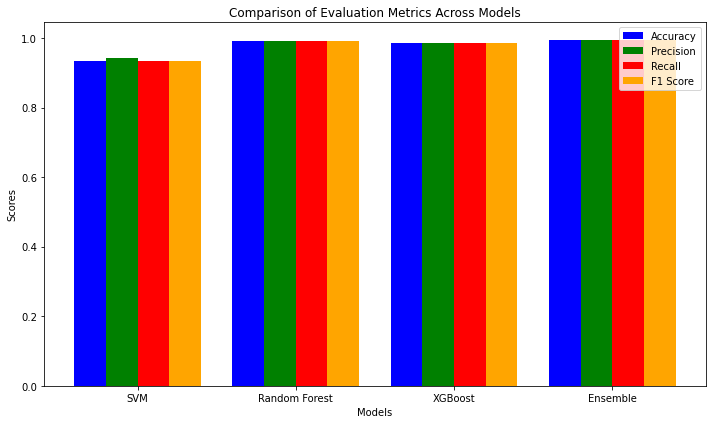

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation metrics for each model
models = ['SVM', 'Random Forest', 'XGBoost', 'Ensemble']
accuracy = [accuracy_svm, accuracy_rf, accuracy_xgb, accuracy_ensemble]  # Replace with actual metric values
precision = [precision_svm, precision_rf, precision_xgb, precision_ensemble]
recall = [recall_svm, recall_rf, recall_xgb, recall_ensemble]
f1_score = [f1_svm, f1_rf, f1_xgb, f1_ensemble]

# Set the positions of the bars on the x-axis
bar_width = 0.2
index = np.arange(len(models))

# Create a figure and axis for the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric as a separate set of bars
bar1 = ax.bar(index, accuracy, bar_width, label='Accuracy', color='b')
bar2 = ax.bar(index + bar_width, precision, bar_width, label='Precision', color='g')
bar3 = ax.bar(index + 2 * bar_width, recall, bar_width, label='Recall', color='r')
bar4 = ax.bar(index + 3 * bar_width, f1_score, bar_width, label='F1 Score', color='orange')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Evaluation Metrics Across Models')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(models)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
